# Регрессионный анализ
Выполнил студент гр.1375 Нарыжный Даниил. Вариант №18

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
$Линейная\;регрессионная\;модель:$<br>
${\mathbb{E}}_\theta\left(Y\vert z\right)=x\left(z\right)^T\beta$<br>
$Статистическая\;модель$<br>
${\mathbb{E}}_\theta\left(Y\vert z\right)=x^T\beta$<br>
$Var_\theta\varepsilon=\sigma^2E$<br>
$Метод\;наименьших\;квадратов:$<br>
$RSS\left(\beta\right)=\left|\left|Y-X^T\beta\right|\right|=\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\rightarrow min$<br>
$XX^T\beta=XY$<br>
$Решение\;системы:$<br>
$\widehat B=\left(XX^T\right)^{-1}XY$<br>
$Доверительное\;оценивание:$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>

$P_{F_0}\left(\sqrt nD_n<x\right)\rightarrow K\left(x\right),\mathbb{R}\left(x\right)$<br>
$где\;K\;\;распределение\;Колмогорова$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>
$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\left(0 1\right)$<br>
$\psi=\begin{pmatrix}0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}=\beta_1$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>
$Оценка\;параметра\;S^2:$<br>
$S^2=\frac{RSS\left(\widehat\beta\right)}{\left(n-r\right)}$<br>
$где\;\widehat\beta\;-\;мнк\;оценка\;параметра$ <br>
$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)$<br>

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной Х. Построить МНК оценки параметров сдвига B_0 и масшаба B_1. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки**

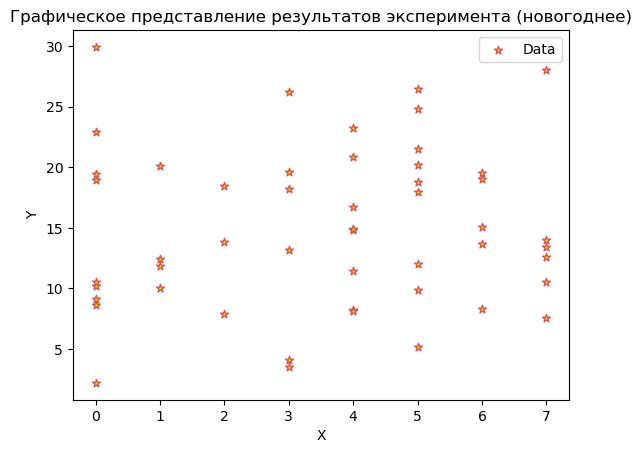

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#Исходные данные 
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [13.41, 12.47, 11.83, 19.57, 24.84, 18.42, 10.50, 2.21, 13.80, 10.22, 8.62, 4.10, 9.15, 15.05, 18.99, 11.41, 22.91, 14.79, 12.60, 20.08, 13.20, 8.25, 10.06, 16.76, 27.99, 18.18, 18.00, 13.70, 21.54, 3.50, 19.42, 20.15, 19.00, 14.91, 10.56, 18.82, 7.89, 9.90, 14.04, 12.02, 29.93, 26.45, 5.18, 8.18, 7.59, 19.52, 20.82, 26.25, 23.21, 8.30]

def ScatterPlot(x: list, y:list)->None:
    """
    Функция для построения графика зависимости (новогодний!)
    Праздник к нам приходит...
    """
    plt.scatter(x, y, marker='*', color='#FFD700', edgecolor='#CD5C5C', label='Data')
    plt.title("Графическое представление результатов эксперимента (новогоднее)")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

ScatterPlot(x,y)

$Альтернативная\;форма\;лин.регрессионной\;модели:$<br>

$Y=x^T\beta+\varepsilon,\;Var_\theta\varepsilon=\sigma^2E$<br>

$Нормальные\;уравнения:$<br>

$XX^T\beta=XY$<br>

$Решение\;системы:$<br>

$\widehat B=\left(XX^T\right)^{-1}XY$<br>

$полученные\;МНК-оценки$<br>

$\widehat\beta=\begin{pmatrix}14.255\\0.201\end{pmatrix}$<br>


x
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [7. 1. 1. 3. 5. 2. 7. 0. 2. 0. 0. 3. 0. 6. 0. 4. 0. 4. 7. 1. 3. 4. 1. 4.
  7. 3. 5. 6. 5. 3. 0. 5. 6. 4. 0. 5. 2. 5. 7. 5. 0. 5. 5. 4. 7. 6. 4. 3.
  4. 6.]]

XX_T
 [[ 50. 177.]
 [177. 897.]]
beta
 [14.25545152  0.20066341]



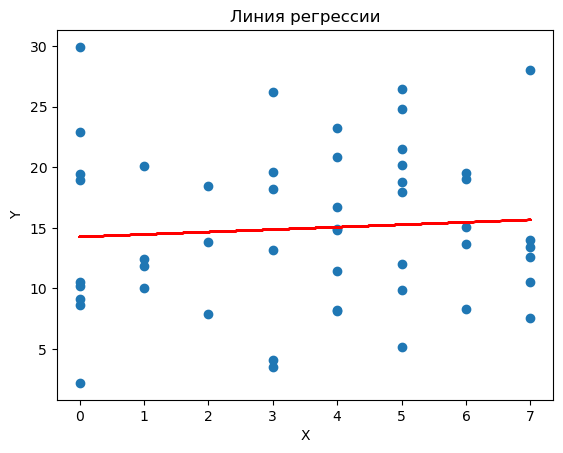

In [128]:
import numpy as np
def ScatterPlot(x: list, y:list)->None:
    """
    Функция для графического представления результата эксперимента
    """
    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')

def LinearRegression(x: list,y:list)->float:
    """
    Для построения регресионной модели переменной Y по Х
    """
    n:int = len(x)
    X = np.array([np.ones(n),x])
    print(f"x\n {X}\n")
    X_T = np.transpose(X)
    XX_T = np.dot(X,X_T)
    print("XX_T\n",XX_T)
    XX_T_inverted = np.linalg.inv(XX_T)
    B = np.dot(np.dot(XX_T_inverted,X),y)
    print(f"beta\n {B}\n")
    ScatterPlot(x,y)
    yr = B[0]+B[1]*np.array(x)
    plt.plot(np.array(x),yr,color="red")
    plt.title("Линия регрессии")
    plt.show()
    return B,X,XX_T
beta,X,XX_T = LinearRegression(x,y)



Анализируя полученый график, можно заметить отклонение между построенной линией регресиии и полученным результатом

**2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h=2.40. Проверить гипотезу нормальности ошибок на уровне значимости alpha=0.02  по chi^2 (x). Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Bизуально оценить данный факт**

$Оценка\;параметра\;S^2:$<br>
$S^2=\frac{RSS\left(\widehat\beta\right)}{\left(n-r\right)}$<br>
$Метод\;наименьших\;квадратов:$<br>

$RSS\left(\widehat\beta\right)=\left|\left|Y-X^T\beta\right|\right|^2=\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\rightarrow min$<br>

$где\;\widehat\beta\;-\;мнк\;оценка\;параметра$ <br>
$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\approx44.394$<br>
$r=2$<br>

Дисперсия: 44.3939778954959


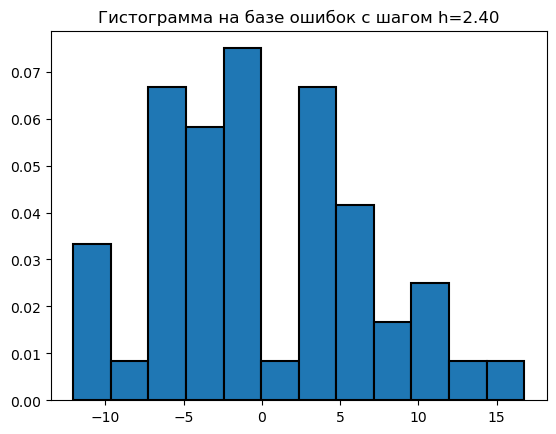

Интервал 1 (-12.05; -9.65):4 чисел
Интервал 2 (-9.65; -7.25):1 чисел
Интервал 3 (-7.25; -4.85):8 чисел
Интервал 4 (-4.85; -2.45):7 чисел
Интервал 5 (-2.45; -0.05):9 чисел
Интервал 6 (-0.05; 2.35):1 чисел
Интервал 7 (2.35; 4.75):8 чисел
Интервал 8 (4.75; 7.15):5 чисел
Интервал 9 (7.15; 9.55):2 чисел
Интервал 10 (9.55; 11.95):3 чисел
Интервал 11 (11.95; 14.35):1 чисел
Интервал 12 (14.35; 16.75):1 чисел
[-12.04545152  -9.64545152  -7.24545152  -4.84545152  -2.44545152
  -0.04545152   2.35454848   4.75454848   7.15454848   9.55454848
  11.95454848  14.35454848  16.75454848]


In [129]:
def Calc_dispersia(x:list,X:np.array,Y:list,beta:float)->float:
    """
    Подсчет несмещённой оценки дисперсии
    """
    XB = np.dot(X.T,beta)
    mistake = (Y- XB) #Ошибка 
    r = 2
    n = len(x)
    S_2 =np.dot(np.transpose(mistake),mistake)/(n-r)
    print(f"Дисперсия: {S_2}")
    hystogram_based_on_mistakes(mistake)
    return S_2,mistake

def hystogram_based_on_mistakes(mistakes):
    """
    Функция для построения графика на базе ошибок, шаг 
    h=2.4
    """
    h = 2.4
    bins = np.arange(min(mistakes), max(mistakes) + h, h)
    histogram, bin_edges = np.histogram(mistakes, bins=bins)

    plt.hist(mistakes, bins=bins,edgecolor='black',linewidth=1.5,density=True)
    plt.title("Гистограмма на базе ошибок с шагом h=2.40")
    plt.show()

    for i in range(len(histogram)):
        print(f"Интервал {i+1} ({bin_edges[i]:.2f}; {bin_edges[i+1]:.2f}):{histogram[i]} чисел")
    plt.show()
    print(bin_edges)

S_2,mistake = Calc_dispersia(x,X,y,beta)

Cледует заметить, что несмещенная оценка дисперсии предоставляет информациюю о разбросе данных. Если значение дисперсии велико, то и разброс также будет больше. Если дисперсия мала, то это означает, что большинство значений выборки близки к среднему. B данной работе дисперсия приблизительно равна 44.394, что говорит о приличном разбросе значений в выборке относительного среднего.

$Основная\;гипотеза:\;H_0\sim\mathcal N\left(0,\sigma^2\right)$<br>

##### $Проверка\;гипотезы\;нормальности\;ошибок\;на\;уровне\;значимости\;\alpha=0.02\;по\;\chi^2$<br>

$Объединяем\;интервалы\;таким\;образом,\;чтобы\;в\;каждом\;было\;5\;и\;более\;элементов$<br>
$I_1=(-\infty;-7.25\rbrack;\\n_1=5$<br>
$I_2=(-7.25;-4.85\rbrack;\\n_2=8$<br>
$I_3=(-4.85;-2.45\rbrack;\\n_3=7$<br>
$I_4=(-2.45;-0.05\rbrack;\\n_4=9$<br>
$I_5=(-0.05;4.75\rbrack;\\n_5=9$<br>
$I_6=(4.75;7.15\rbrack;\\n_6=5$<br>
$I_7=\left(7.15;+\infty\right);\\n_7=7$<br>

$\chi^2=\sum_{i=1}^7\frac{\left(n_i-n\times P_i\right)^2}{n\times P_i}=4.776$<br>

In [130]:
from math import sqrt
from scipy import stats as sts
def HypothesisCheck(intervals:list,n_element:list,sigma:float,alpha:float):
    """
    Функция для проверки гипотезы нормальности ошибок.
    """
    alpha0:int = 0
    res:list = []
    n: int =  50
    for i in range(1,len(intervals)):
        res.append(sts.norm.cdf(intervals[i],alpha0,sigma)-sts.norm.cdf(intervals[i-1],alpha0,sigma))
    res.insert(0,sts.norm.cdf(intervals[0],alpha,sigma))
    res.append(1-sts.norm.cdf(intervals[-1],alpha,sigma))
    for i in range(len(res)):
        print(f"P{i+1}: {res[i]}",sep=" ")
        print(f"nP{i+1}: {res[i]*n}\n")

    #Подсчёт хи квадрата по имеющиейся выборке ((n_i-nPi)/n*Pi)
    chi_observed:float = sum([(n_element[i]-n*res[i])**2/(n*res[i]) for i in range(len(n_element))])
    
    chi_from_func: float = sts.chi2.ppf(1-alpha,len(res)-1) 
    print("Полученный хи^2", chi_observed)
    print(f'Табличное значение при уровне значимости {alpha}, степени свободы {len(res)-1} = {chi_from_func}')
    if chi_from_func>chi_observed:
        print("Нет оснований отвергнуть гипотезу")
    else:
        print(f"По критерию Пирсона гипотеза отвергается, т.к. {chi_from_func}<{chi_observed}")
    print(f"Наибольшее значение уровня значимости, при котором нет оснований отвергать гипотезу={1-sts.chi2.cdf(chi_observed,len(res)-1)}")


#список для интервалов и количества элементов в этих интервалах.
l_intervals: list = [-7.25,-4.85,-2.45,-0.05,4.75,7.15]
n_elements: list = [5,8,7,9,9,5,7]
#кол-во интервалов
count_of_intervals = len(l_intervals)

n:int = 50
a: float = 0.02
sigma: float = sqrt(S_2)

HypothesisCheck(l_intervals,n_elements, sigma,a)

P1: 0.1376101170384212
nP1: 6.880505851921059

P2: 0.09506178366947998
nP2: 4.753089183473999

P3: 0.12321187634256675
nP3: 6.160593817128338

P4: 0.14046108123794637
nP4: 7.0230540618973185

P5: 0.2650414251730337
nP5: 13.252071258651684

P6: 0.09634130367302096
nP6: 4.817065183651048

P7: 0.1422854112144305
nP7: 7.1142705607215255

Полученный хи^2 4.775952514331598
Табличное значение при уровне значимости 0.02, степени свободы 6 = 15.033207751218962
Нет оснований отвергнуть гипотезу
Наибольшее значение уровня значимости, при котором нет оснований отвергать гипотезу=0.572853285706211


$\chi^2<\chi_{0.98,6}^2\;\;-\;нет\;оснований,\;чтобы\;отвергать\;гипотезу$<br>

$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>

$\sqrt nD\approx5.798,\;x_\approx=1.517$<br>
$\sqrt nD>x_\alpha\;-\;гипотеза\;отвергается$<br>

Cтатистика критерия Колмогорова: 0.82
 sqrt(n)*D_n:5.79827560572969
 Ks_p_value: 3.770852330233186e-17
 Квантиль x_a: K(x_a)=1-alpha=1.5174269646320033

Гипотеза отвергается


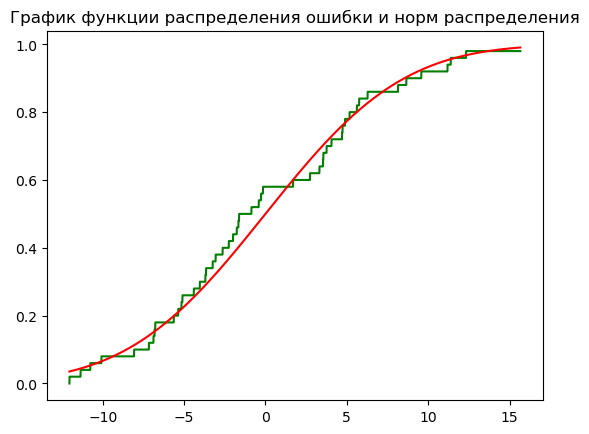

In [131]:
from scipy.stats import kstest,  norm,kstwobign
import numpy as np
from numpy import sqrt

def KolmogorovCriteria(data:list,cdf:any,n:int,alpha:float)->None:
    """
    Для подсчета критерия Колмогорова, квантиля и проверки гипотезы
    """
    ks_statistics,ks_p_value = kstest(data,cdf)

    kvantil:float = kstwobign.ppf(1-alpha)
    temp:float = sqrt(n)*ks_statistics

    print(f"Cтатистика критерия Колмогорова: {ks_statistics}\n",
          f"sqrt(n)*D_n:{temp}\n",
          f"Ks_p_value: {ks_p_value}\n",
          f"Квантиль x_a: K(x_a)=1-alpha={kvantil}\n"),
    if temp>kvantil:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований, чтобы отвергнуть гипотезу")

def Cdf_func(data:list,alpha0:int,sigma0:int)->any:
    return norm.cdf(data,loc=alpha0,scale=sigma0)

def FuncBuilder(mistakes:list, n:int,sigma0:float)->None:
    """
    Для построения графика распределения ошибки и нормального распределения
    """
    h = 0.01
    x = (np.arange(min(mistakes), max(mistakes),h))
    y_mistakes: list  = []
    y_nrm_cdf: list = []
        
    for x_value in x:
        temp:int = 0
        for i in range(n):
            if mistakes[i]>=x_value:
                continue
            temp +=1
        y_mistakes.append(temp/n)

    for x_value in x:
        y_nrm_cdf.append(sts.norm.cdf(x_value,0,sigma0))
    
    plt.plot(x,y_mistakes,color="green")
    plt.plot(x,y_nrm_cdf,color="red")
    plt.title("График функции распределения ошибки и норм распределения")
    
alpha:float = 0.02
sigma0:float = sqrt(S_2)
My_cdf = Cdf_func(x,alpha,sigma0)
KolmogorovCriteria(x,My_cdf,n,alpha)
FuncBuilder(mistake,n,sigma0)

Проанализировав полученный график, можно заметить, что наблюдаются довольно сильные отклонения в промежутке от -5 до 5 как в нижнюю сторону, так и в верхнюю сторону. И при уровне значимости 1-alpha гипотеза отвергается

**3. B предложении нормальности ошибок построить доверительные интервалы для параметров B_0 и B1 уровня доверия 1-alpha, alpha=0.02. Построить доверительный эллипс уровня доверия 1-alpha для (B_0,B_1) (вычислить его полуоси)**

$ДНО\;функция:$<br>
$\psi=С^Т\beta,C=\left(C_1,...C_n\right)^T$<br>
$Оценка:$<br>
$\widehat\psi=C^T\widehat\beta$<br>
$Элемент\;дисперсии\;оценки:$<br>
$\;b_\psi=C^T\left(XX^T\right)^{-1}C$<br>
$Распределение:$<br>
$\frac{\widehat\psi}{s\sqrt b}\sim S_{n-r}$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Каноническаяя\;формула\;Эллипса\;в\;двумерном\;пространстве:$<br>
$\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$<br>
$формула\;полуосей\;(большой\;полуоси\;и\;малой):$<br>
$a=\sqrt{\frac{C^\ast}{\lambda_1}},b=\sqrt{\frac{C^\ast}{\lambda_2}}$<br>

$Доверительный\;интервал\;для\;\beta_0:$<br>
$\left[10.125;18.385\right]\ni\beta_0$<br>
$Доверительный\;интервал\;для\;\beta_1:$<br>
$\left[-0.774;1.176\right]\ni\beta_1$<br>


beta0 14.255451519857997
left_board: 10.125410370013128
right board: 18.385492669702867

beta1 0.2006634124694915
left_board: -0.7744231228496844
right board: 1.1757499477886673
4.248907630769176


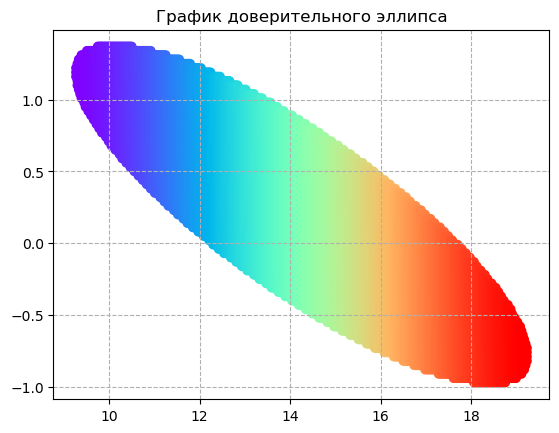

In [132]:
def CalculatePsi(C_0_T:list,C_1_T:list,beta:list)->list:
    """
    Подсчет  Psi для beta0 и beta1
    """
    Psi_0 = np.dot(C_0_T,beta)
    Psi_1 = np.dot(C_1_T,beta)
    return [Psi_0,Psi_1]

def CalculateDpsi(C_0_T:list,C_1_T:list,XX_T:np.array)->list:
    XX_T_inv = np.linalg.inv(XX_T)
    Dpsi_0 = np.dot(np.dot(np.transpose(C_0_T),XX_T_inv),C_0_T)
    Dpsi_1 = np.dot(np.dot(np.transpose(C_1_T),XX_T_inv),C_1_T)
    return [Dpsi_0,Dpsi_1]
def CalculateInterval(Psi:list,alpha:float,n:int,Dpsi:list,S:float)->None:
    """
    Для построения доверительного интервала для beta0, beta1 (левая и правая граница)
    """
    x_alpha:float = sts.t.ppf(1-alpha,n-2)
    left_board_b0 = (Psi[0]-x_alpha*S*sqrt(Dpsi[0]))
    right_board_b0 = (Psi[0]+x_alpha*S*sqrt(Dpsi[0]))
    left_board_b1 = (Psi[1]-x_alpha*S*sqrt(Dpsi[1]))
    right_board_b1 = (Psi[1]+x_alpha*S*sqrt(Dpsi[1]))
    print(f"\nbeta0 {Psi[0]}\nleft_board: {left_board_b0}\nright board: {right_board_b0}")
    print(f"\nbeta1 {Psi[1]}\nleft_board: {left_board_b1}\nright board: {right_board_b1}")

def CalculateEllipseInterval(alpha:float,S_2:float, Psi:list,XX_T:float):
    """
    Для построения доверительного эллипса (подсчет уровня доверия, график)
    """
    x_alpha:float=sts.f.ppf(1-alpha,2,n-2)
    print(x_alpha)
    temp: int = 5
    q_S_2_x_a:float = 2*S_2*x_alpha
    ar0,ar1 = [],[]
    h: float = 0.03
    for beta_0 in np.arange(11-temp,19+temp,step=h):
        for beta_1 in np.arange(-2-temp,1+temp,step=h):
            betas:list = [beta_0,beta_1]
            cor_x  =np.array(betas)-np.array(Psi)
            cor_x_T = np.transpose(cor_x)
            if np.dot(np.dot(cor_x_T,XX_T),cor_x)>q_S_2_x_a:
                continue
            ar0.append(beta_0)
            ar1.append(beta_1)
    plt.title("График доверительного эллипса")
    plt.scatter(ar0,ar1, c=np.arange(len(ar0)), cmap='rainbow')
    plt.grid(True, linestyle='--')
    plt.show()
                
C_0_T: list = [1,0]
C_1_T: list = [0,1]
Psi: list = CalculatePsi(C_0_T,C_1_T,beta)
Dpsi: list = CalculateDpsi(C_0_T,C_1_T,XX_T)
alpha1: float = alpha/2
S = sqrt(S_2)
CalculateInterval(Psi,alpha1,n,Dpsi,S)
CalculateEllipseInterval(alpha,S_2,Psi,XX_T)

$Нахождение\;полуосей\;Эллипса:$<br>
$\left(\overrightarrow x-\widehat\psi\right)b^{-1}\left(\overrightarrow x-\widehat\psi\right)=\left(\begin{pmatrix}b_0\\b_1\end{pmatrix}-\widehat\psi\right)^T\times\begin{pmatrix}50&177\\177&897\end{pmatrix}\times\left(\begin{pmatrix}b_0\\b_1\end{pmatrix}-\widehat\psi\right)$<br>
$=\begin{pmatrix}b_0-14.25545\\b_1+0.200663\end{pmatrix}^T\times\begin{pmatrix}50&177\\177&897\end{pmatrix}\times\left(\begin{pmatrix}b_0-14.25545\\b_1+0.200663\end{pmatrix}\right)$<br>
$Получаем\;следующее\;выражение:$<br>

$Получаем\;следующее\;выражение$<br>
$50\times b_0^2+897\times b_1^2+354\times b_0\times b_1-1354.511\times b_0-4686.445\times b_1+9184.393$<br>
$50\times b_0^2+354\times b_0\times b_1-1354.511\times b_0+897\times b_1^2-4686.445\times b_1+9184.393$<br>
$Поиск\;собственных\;чисел..\;$<br>
$M\;=\;\begin{pmatrix}50&177\\177&897\end{pmatrix}$<br>
$\begin{vmatrix}50-\lambda&177\\177&897-\lambda\end{vmatrix}=0\rightarrow\left(50-\lambda\right)\left(897-\lambda\right)-177^2=44850-50\lambda-897\lambda+\lambda^2-31329$<br>
$=\lambda^2-947\lambda+13521$<br>
$\lambda_1=14.499;\lambda_2=932.500$<br>
$Большая\;и\;малая\;полуось:$<br>
$a=\sqrt{\frac{qS^2x_\alpha}{\lambda_1}},b=\sqrt{\frac{qS^2x_\alpha}{\lambda_2}}$<br>
$a=\sqrt{\frac{2.00\times44.394\times4.248}{14.499}}=5.100$<br>
$b=\sqrt{\frac{2.00\times44.394\times4.248}{932.500}}=0.636$<br>

**4.Сформулировать гипотезу независимости переменной Y от переменной Х. Провести проверку значимости**

$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\left(0 1\right)$<br>
$\psi=\begin{pmatrix}0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}=\beta_1$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>

In [133]:
def HypotesisCalc(n:int,x:list,alpha:float,beta:np.array,S_2:float)->None:
    """
    Для Гипотезы независимости переменной Y от Х
    """
    C_T: np.array = np.array([0,1])
    C: np.array = np.transpose(C_T)

    x_alpha:float = (sts.f(1,n-2)).ppf(1-alpha)

    XX_T = np.linalg.inv(np.dot(X, np.transpose(X)))
    C_T_XX_T_C = np.dot(np.dot(C_T,XX_T), C)    
    f = beta[1]**2/(C_T_XX_T_C*1*S_2)
    print(f"F=",f)
    print("x_alpha", x_alpha)
    if x_alpha<f:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований отвергать гипотезу")
a:float = 0.02
print(X)
HypotesisCalc(n,X,a,beta,S_2)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]
 [7. 1. 1. 3. 5. 2. 7. 0. 2. 0. 0. 3. 0. 6. 0. 4. 0. 4. 7. 1. 3. 4. 1. 4.
  7. 3. 5. 6. 5. 3. 0. 5. 6. 4. 0. 5. 2. 5. 7. 5. 0. 5. 5. 4. 7. 6. 4. 3.
  4. 6.]]
F= 0.2452737855983327
x_alpha 5.7916334248808425
Нет оснований отвергать гипотезу


**5. Сформулировать модель, включающую дополнительный член с Х^2. Построить МНК оценки параметров B_0,B_1,B_2 в данной модели. Изобразить графически полученную регрессионную зависимость**

$Альтернативная\;форма\;лин.регрессионной\;модели:$<br>

$Y=x^T\beta+\varepsilon,\;Var_\theta\varepsilon=\sigma^2E$<br>

$Y=\beta_0+\beta_1X+\beta_2X^2+\varepsilon$<br>

$Нормальные\;уравнения:$<br>

$XX^T\beta=XY$<br>

$Решение\;системы:$<br>

$\widehat B=\left(XX^T\right)^{-1}XY$<br>

$\widehat B=\begin{pmatrix}14.0253\\0.4781\\-0.0419\end{pmatrix}$<br>

XX_T
 [[   50   177   897]
 [  177   897  4965]
 [  897  4965 29097]]
[[ 0.09227228 -0.04436379  0.0047255 ]
 [-0.04436379  0.0414135  -0.005699  ]
 [ 0.0047255  -0.005699    0.00086115]]
[14.02539579  0.47811256 -0.04192387]


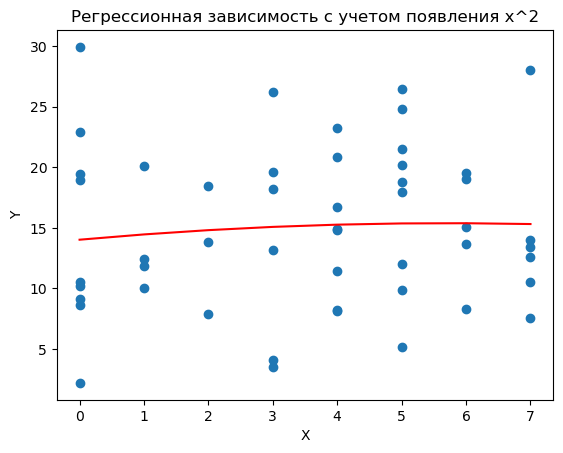

In [134]:
import numpy as np
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [13.41, 12.47, 11.83, 19.57, 24.84, 18.42, 10.50, 2.21, 13.80, 10.22, 8.62, 4.10, 9.15, 15.05, 18.99, 11.41, 22.91, 14.79, 12.60, 20.08, 13.20, 8.25, 10.06, 16.76, 27.99, 18.18, 18.00, 13.70, 21.54, 3.50, 19.42, 20.15, 19.00, 14.91, 10.56, 18.82, 7.89, 9.90, 14.04, 12.02, 29.93, 26.45, 5.18, 8.18, 7.59, 19.52, 20.82, 26.25, 23.21, 8.30]

def ScatterPlot(x: list, y:list)->None:
    """
    Для построения графического представления эксперимента
    """
    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')

def LinearRegression(x: list,y:list)->float:
    """
    Функция для нахождения МНК оценки и построения графика регрессионной зависимости
    """
    n:int = len(x)
    X = np.array([[1]*50,x,list(map(lambda el: el**2, x))])
    X_T = np.transpose(X)
    XX_T = np.dot(X,X_T)
    print("XX_T\n",XX_T)
    XX_T_inverted = np.linalg.inv(XX_T)
    print(XX_T_inverted)
    XX_T_inv_X = np.dot(XX_T_inverted,X)
    B = np.dot(XX_T_inv_X,y)
    print(B)
    ScatterPlot(x,y)
    yr = B[0]+B[1]*np.sort(x)+B[2]*(np.sort(x)**2)
    plt.plot(np.sort(x),yr,color="red")
    plt.title("Регрессионная зависимость с учетом появления х^2")
    plt.show()
    return B,X,XX_T
beta,X, XX_T = LinearRegression(x,y)

**6 Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2**<br>

$S^2=\frac1{\left(n-r\right)}\left(Y-X^T\beta\right)^T\left(Y-X^T\beta\right)\approx48.257$<br>

48.257049318995946


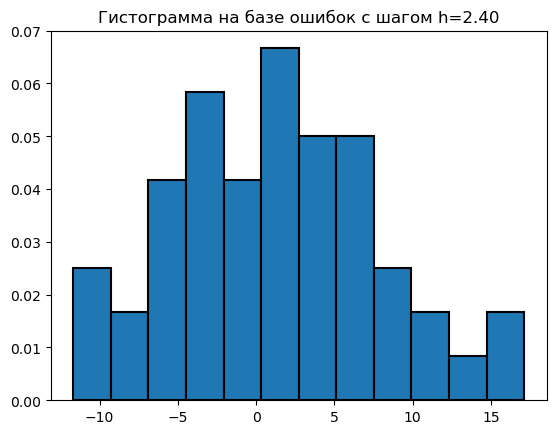

Интервал 1 (-11.68; -9.28):3 чисел
Интервал 2 (-9.28; -6.88):2 чисел
Интервал 3 (-6.88; -4.48):5 чисел
Интервал 4 (-4.48; -2.08):7 чисел
Интервал 5 (-2.08; 0.32):5 чисел
Интервал 6 (0.32; 2.72):8 чисел
Интервал 7 (2.72; 5.12):6 чисел
Интервал 8 (5.12; 7.52):6 чисел
Интервал 9 (7.52; 9.92):3 чисел
Интервал 10 (9.92; 12.32):2 чисел
Интервал 11 (12.32; 14.72):1 чисел
Интервал 12 (14.72; 17.12):2 чисел
[-11.67792261  -9.27792261  -6.87792261  -4.47792261  -2.07792261
   0.32207739   2.72207739   5.12207739   7.52207739   9.92207739
  12.32207739  14.72207739  17.12207739]
Несмещенная оценка дисперсии 48.257049318995946


In [135]:
import numpy as np
x: list = [7, 1, 1, 3, 5, 2, 7, 0, 2, 0, 0, 3, 0, 6, 0, 4, 0, 4, 7, 1, 3, 4, 1, 4, 7, 3, 5, 6, 5, 3, 0, 5, 6, 4, 0, 5, 2, 5, 7, 5, 0, 5, 5, 4, 7, 6, 4, 3, 4, 6]
y: list = [13.41, 12.47, 11.83, 19.57, 24.84, 18.42, 10.50, 2.21, 13.80, 10.22, 8.62, 4.10, 9.15, 15.05, 18.99, 11.41, 22.91, 14.79, 12.60, 20.08, 13.20, 8.25, 10.06, 16.76, 27.99, 18.18, 18.00, 13.70, 21.54, 3.50, 19.42, 20.15, 19.00, 14.91, 10.56, 18.82, 7.89, 9.90, 14.04, 12.02, 29.93, 26.45, 5.18, 8.18, 7.59, 19.52, 20.82, 26.25, 23.21, 8.30]

beta: list = [13.88792261,  0.75176744, -0.15296429]
X = np.array([[1]*50,x,list(map(lambda el: el**2, x))])

def Calc_dispersia(x:list,X:np.array,Y:list,beta:float)->float:
    """
    Подсчет дисперсии
    """
    XB = np.dot(X.T,beta)
    mistake = (Y- XB)
    r = 3 # 3 параметра
    n = len(x)
    S_2 =np.dot(np.transpose(mistake),mistake)/(n-r)
    print(S_2)
    hystogram_based_on_mistakes(mistake)
    return S_2,mistake
def hystogram_based_on_mistakes(mistakes):
    """
    Функция для построения гистограммы на базе ошибок
    """
    h = 2.4
    bins = np.arange(min(mistakes), max(mistakes) + h, h)
    histogram, bin_edges = np.histogram(mistakes, bins=bins)

    plt.hist(mistakes, bins=bins,edgecolor='black',linewidth=1.5,density=True)
    plt.title("Гистограмма на базе ошибок с шагом h=2.40")
    plt.show()

    # Вывод количества чисел в каждом интервале
    for i in range(len(histogram)):
        print(f"Интервал {i+1} ({bin_edges[i]:.2f}; {bin_edges[i+1]:.2f}):{histogram[i]} чисел")
    plt.show()
    print(bin_edges)
S_2,mistake = Calc_dispersia(x,X,y,beta)
print("Несмещенная оценка дисперсии",S_2)

$Объединяем\;интервалы\;таким\;образом,\;чтобы\;в\;каждом\;было\;5\;и\;более\;элементов$<br>
$I_1=(-\infty;-6.88\rbrack;\\n_1=5$<br>
$I_2=(-6.88;-4.48\rbrack;\\n_2=5$<br>
$I_3=(-4.48;-2.08\rbrack;\\n_3=7$<br>
$I_4=(-2.08;0.32\rbrack;\\n_4=5$<br>
$I_5=(0.32;2.72\rbrack;\\n_5=8$<br>
$I_6=(2.72;5.12\rbrack;\\n_6=6$<br>
$I_7=(5.12;7.52\rbrack;\\n_7=6$<br>
$I_8=\left(7.52;+\infty\right);\\n_8=8$<br>

$\chi^2=\sum_{i=1}^7\frac{\left(n_i-n\times P_i\right)^2}{n\times P_i}=2.5913$<br>

In [136]:
from math import sqrt
from scipy import stats as sts
def HypothesisCheck(intervals:list,n_element:list,sigma:float,alpha:float):
    """
    Функция для проверки гипотезы нормальности ошибок.
    """
    alpha0:int = 0
    res:list = []
    n: int =  50
    for i in range(1,len(intervals)):
        res.append(sts.norm.cdf(intervals[i],alpha0,sigma)-sts.norm.cdf(intervals[i-1],alpha0,sigma))
    res.insert(0,sts.norm.cdf(intervals[0],alpha,sigma))
    res.append(1-sts.norm.cdf(intervals[-1],alpha,sigma))
    for i in range(len(res)):
        print(f"P{i+1}: {res[i]}",sep=" ")
        print(f"nP{i+1}: {res[i]*n}\n")

        
    chi_observed:float = sum([(n_element[i]-n*res[i])**2/(n*res[i]) for i in range(len(n_element))])
    print("Полученный хи^2", chi_observed)
    chi_from_func: float = sts.chi2.ppf(1-alpha,len(res)-1) 
    print(f'Табличное значение при уровне значимости {alpha}, степени свободы {len(res)-1} = {chi_from_func}')
    if chi_from_func>chi_observed:
        print("Нет оснований отвергнуть гипотезу")
    else:
        print(f"По критерию Пирсона гипотеза отвергается, т.к. {chi_from_func}<{chi_observed}")
    print(f"Наибольшее значение уровня значимости, при котором нет оснований отвергать гипотезу={1-sts.chi2.cdf(chi_observed,len(res)-1)}")

l_intervals: list = [-6.88,-4.48,-2.08,0.32,2.72,5.12,7.52]
n_elements: list = [5,5,7,5,8,6,6,8]
count_of_intervals = len(l_intervals)
n:int = 50
a: float = 0.02
sigma: float = sqrt(S_2)
HypothesisCheck(l_intervals,n_elements, sigma,a)

P1: 0.16028842196594195
nP1: 8.014421098297097

P2: 0.09850270972990577
nP2: 4.9251354864952885

P3: 0.122815770188695
nP3: 6.14078850943475

P4: 0.13606147904336074
nP4: 6.803073952168037

P5: 0.13393434580535823
nP5: 6.6967172902679115

P6: 0.11714516238328776
nP6: 5.857258119164388

P7: 0.09103985561690364
nP7: 4.5519927808451826

P8: 0.14015020046340076
nP8: 7.007510023170038

Полученный хи^2 2.591341907175416
Табличное значение при уровне значимости 0.02, степени свободы 7 = 16.622421871110873
Нет оснований отвергнуть гипотезу
Наибольшее значение уровня значимости, при котором нет оснований отвергать гипотезу=0.9200633305435265


$\chi^2<\chi_{0.98,6}^2\;\;-\;нет\;оснований,\;чтобы\;отвергать\;гипотезу$<br>

$Статистика\;Колмогорова:$<br>
$D_n=sup_{x\in\mathbb{R}}\left|F_n\left(x\right)-F_0\left(x\right)\right|$<br>
$Критерий:$<br>
$\widehat{\varphi\left(\overrightarrow x\right)}=\left\{\begin{array}{l}0,\widehat{D_n}<x_\alpha\\1,\widehat{D_n}\geq x_\alpha\end{array}\right.$<br>
$Теорема\;Колмогорова:$<br>
$\sqrt nD_n\rightarrow K$<br>

Cтатистика критерия Колмогорова: 0.82
 sqrt(n)*D_n:5.79827560572969
 Ks_p_value: 3.770852330233186e-17
 Квантиль x_a: K(x_a)=1-alpha=1.5174269646320033

Гипотеза отвергается


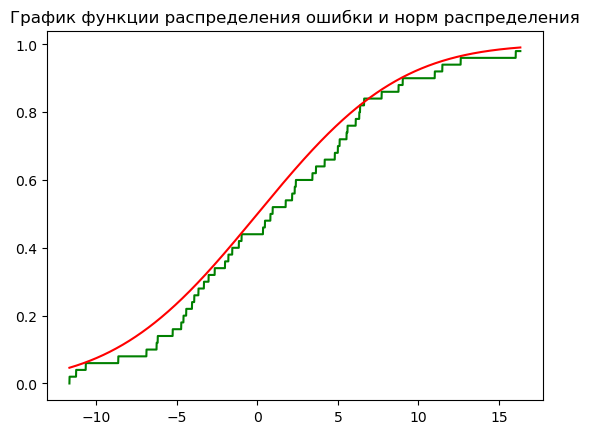

In [137]:
from scipy.stats import kstest,  norm,kstwobign
import numpy as np
from numpy import sqrt

def KolmogorovCriteria(data:list,cdf:any,n:int,alpha:float)->None:
    """
    Для подсчета критерия Колмогорова, квантиля и проверки гипотезы
    """
    ks_statistics,ks_p_value = kstest(data,cdf)

    kvantil:float = kstwobign.ppf(1-alpha)
    temp:float = sqrt(n)*ks_statistics

    print(f"Cтатистика критерия Колмогорова: {ks_statistics}\n",
          f"sqrt(n)*D_n:{temp}\n",
          f"Ks_p_value: {ks_p_value}\n",
          f"Квантиль x_a: K(x_a)=1-alpha={kvantil}\n"),
    if temp>kvantil:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований, чтобы отвергнуть гипотезу")

def Cdf_func(data:list,alpha0:int,sigma0:int)->any:
    return norm.cdf(data,loc=alpha0,scale=sigma0)


def FuncBuilder(mistakes:list, n:int,sigma0:float)->None:
    """
    Для построения графика
    """
    h = 0.01
    x = (np.arange(min(mistakes), max(mistakes),h))
    y_mistakes: list  = []
    y_nrm_cdf: list = []
        
    for x_value in x:
        temp:int = 0
        for i in range(n):
            if mistakes[i]>=x_value:
                continue
            temp +=1
        y_mistakes.append(temp/n)

    for x_value in x:
        y_nrm_cdf.append(sts.norm.cdf(x_value,0,sigma0))
    
    plt.plot(x,y_mistakes,color="green")
    plt.plot(x,y_nrm_cdf,color="red")
    plt.title("График функции распределения ошибки и норм распределения")
alpha:float = 0.02
sigma0:float = sqrt(S_2)
My_cdf = Cdf_func(x,alpha,sigma0)
KolmogorovCriteria(x,My_cdf,n,alpha)
FuncBuilder(mistake,n,sigma0)

Проанализировав полученный график, можно заметить, что довольно сильные отклонения наблюдаются в интервале от -10 как в нижнюю, так и в верхнюю сторону. И при уровне значимости 1-alpha гипотеза отвергается

**7.B предположении нормальности ошибок построить доверительные интевалы для параметров Beta_0,Beta_1,Beta_2 уровня доверия 1-alpha, alpha=0.02. Написать уравнение доверительного эллипсоида уровня доверия 1-alpha, alpha=0.02**

$ДНО\;функция:$<br>
$\psi=С^Т\beta,C=\left(C_1,...C_n\right)^T$<br>
$Оценка:$<br>
$\widehat\psi=C^T\widehat\beta$<br>
$Элемент\;дисперсии\;оценки:$<br>
$\;b_\psi=C^T\left(XX^T\right)^{-1}C$<br>
$Распределение:$<br>
$\frac{\widehat\psi}{s\sqrt b}\sim S_{n-r}$<br>
$Доверительный\;интервал\;уровня\;доверия\;1-\alpha:$<br>
$\left[\widehat\psi-x_\alpha s\sqrt b;\widehat\psi+x_\alpha s\sqrt b\right]\ni\psi$<br>
$\chi_\alpha:S_{n-r}\left(x_\alpha\right)=1-\frac\alpha2$<br>
$Доверительный\;интервал\;эллипса\;уровня\;доверия\;1-\alpha$<br>
$A_\alpha=\left\{\overrightarrow x:\left(\overrightarrow x-\widehat\psi\right)^Тb^{-1}\left(\overrightarrow x-\widehat\psi\right)\leq qS^2x_\alpha\right\}$<br>
$где\;x_\alpha:F_{q,n-r}\left(x_\alpha\right)=1-\alpha$<br>
$Каноническаяя\;формула\;Эллипсоида\;в\;трехмерном\;пространстве:$<br>
$\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1$<br>
$формула\;полуосей\:$<br>
$a=\sqrt{\frac{C^\ast}{\lambda_1}},b=\sqrt{\frac{C^\ast}{\lambda_2}},c=\sqrt{\frac{C^\ast}{\lambda_3}}$<br>

$Доверительный\;интервал\;для\;\beta_0:$<br>
$\left[9.017;18.758\right]\ni\beta_0$<br>
$Доверительный\;интервал\;для\;\beta_1:$<br>
$\left[-2.511;4.014\right]\ni\beta_1$<br>
$Доверительный\;интервал\;для\;\beta_2:$<br>
$\left[-0.623;0.317\right]\ni\beta_2$<br>

In [138]:
def CalculatePsi(C_0_T:list,C_1_T:list,C_2_T:list,beta:list)->list:
    """
    Для подсчета Psi
    """
    Psi_0 = np.dot(C_0_T,beta)
    Psi_1 = np.dot(C_1_T,beta)
    Psi_2 = np.dot(C_2_T,beta)
    return [Psi_0,Psi_1,Psi_2]

def CalculateDpsi(C_0_T:list,C_1_T:list,C_2_T:list,XX_T:np.array)->list:
    XX_T_inv = np.linalg.inv(XX_T)
    Dpsi_0 = np.dot(np.dot(np.transpose(C_0_T),XX_T_inv),C_0_T)
    Dpsi_1 = np.dot(np.dot(np.transpose(C_1_T),XX_T_inv),C_1_T)
    Dpsi_2 = np.dot(np.dot(np.transpose(C_2_T),XX_T_inv),C_2_T)
    return [Dpsi_0,Dpsi_1,Dpsi_2]
def CalculateInterval(Psi:list,alpha:float,n:int,Dpsi:list,S:float)->None:
    """
        Для построения доверительного интервала для beta0, beta1, beta2(левая и правая граница)
    """
    x_alpha:float = sts.t.ppf(1-alpha,n-2)
    print(f"x_alpha",x_alpha)
    left_board_b0 = (Psi[0]-x_alpha*S*sqrt(Dpsi[0]))
    right_board_b0 = (Psi[0]+x_alpha*S*sqrt(Dpsi[0]))
    left_board_b1 = (Psi[1]-x_alpha*S*sqrt(Dpsi[1]))
    right_board_b1 = (Psi[1]+x_alpha*S*sqrt(Dpsi[1]))
    left_board_b2 = (Psi[2]-x_alpha*S*sqrt(Dpsi[2]))
    right_board_b2 = (Psi[2]+x_alpha*S*sqrt(Dpsi[2]))
    print(f"beta0 {Psi[0]}\nleft_board: {left_board_b0}\nright board: {right_board_b0}")
    print(f"beta1 {Psi[1]}\nleft_board: {left_board_b1}\nright board: {right_board_b1}")
    print(f"beta1 {Psi[2]}\nleft_board: {left_board_b2}\nright board: {right_board_b2}")
C_0_T: list = [1,0,0]
C_1_T: list = [0,1,0]
C_2_T: list = [0,0,1]
Psi: list = CalculatePsi(C_0_T,C_1_T,C_2_T,beta)
print(Psi)
Dpsi: list = CalculateDpsi(C_0_T,C_1_T,C_2_T,XX_T)
CalculateInterval(Psi,alpha1,n,Dpsi,S)

[13.88792261, 0.75176744, -0.15296429]
x_alpha 2.4065812732756067
beta0 13.88792261
left_board: 9.017146327058217
right board: 18.758698892941783
beta1 0.75176744
left_board: -2.5113562563226703
right board: 4.01489113632267
beta1 -0.15296429
left_board: -0.6235088626271078
right board: 0.3175802826271078


$Нахождение\;полуосей\;Эллипса:$<br>
$\left(\overrightarrow x-\widehat\psi\right)b^{-1}\left(\overrightarrow x-\widehat\psi\right)=\left(\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}-\widehat\psi\right)^T\times\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}\times\left(\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}-\widehat\psi\right)$<br>
$=\begin{pmatrix}b_0-14.0253\\b_1-0.47811\\\\b_2+0.04192\end{pmatrix}^T\times\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}\times\left(\begin{pmatrix}b_0-14.0253\\b_1-0.47811\\b_2+0.04192\end{pmatrix}\right)$<br>
$Получаем\;следующее\;выражение:$<br>

$50.000\times b_0^2+897\times b_1^2+290297.000\times b_2^2+354.000\times b_0\times b_1+1794.000\times b_0\times b_2-1380.589\times b_0+9930.000\times b_1\times b_2-4746.569\times b_1-23481.411\times b_2+9575.5866$<br>
$50.000\times b_0^2+354.000\times b_0\times b_1+1794.000\times b_0\times b_2-1380.589\times b_0+897\times b_1^2+9930.000\times b_1\times b_2-4746.569\times b_1+29097.000\times b_2^2-23481.411\times b_2+9575.5866$<br>

$Собственные\;числа:$<br>
$M=\begin{pmatrix}50&177&897\\177&897&4965\\897&4965&29097\end{pmatrix}$<br>
$\begin{vmatrix}50-\lambda_1&177&897\\177&897-\lambda_2&4965\\897&4965&29097-\lambda_3\end{vmatrix}=..опускаем\;промежуточные\;вычисления=$<br>
$=\lambda^3-30044\lambda^2+2112546\lambda-15701184$<br>

In [139]:
import numpy as np

def calculate_eigenvalues():
    """
    Функция для подсчета собственных чисел
    """
    coefficients = [1, -30044, 2112546, -15701184]

    eigenvalues = np.roots(coefficients)

    return eigenvalues

eigenvalues_result = calculate_eigenvalues()

print("Собст.числа", eigenvalues_result)


Собст.числа [2.99735371e+04 6.20161437e+01 8.44675017e+00]


$Тогда\;Эллипсоид\;имеет\;следующий\;вид:$<br>
$\frac{\lambda_1}{qS^2x_\alpha}x^2+\frac{\lambda_2}{qS^2x_\alpha}y^2+\frac{\lambda_z}{qS^2x_\alpha}y^2\leq1$<br>

In [140]:
import numpy as np

def calculate_coefficients(q, S_2, x_alpha, Lambda_1, Lambda_2, Lambda_z):
    """
    Функция для подсчета коэффициентов
    """
    coefficient_x = Lambda_1 / (q * S_2 * x_alpha)
    coefficient_y = Lambda_2 / (q * S_2 * x_alpha)
    coefficient_z = Lambda_z / (q * S_2 * x_alpha)
    return coefficient_x, coefficient_y, coefficient_z


q_value = 3 
S_2_value = 48.257049318995946
x_alpha_value = 4.248907630769176
Lambda_1_value = 2.99735371e+04  
Lambda_2_value = 6.20161437e+01 
Lambda_z_value = 8.44675017e+00  

coeff_x, coeff_y, coeff_z = calculate_coefficients(q_value, S_2_value, x_alpha_value, Lambda_1_value, Lambda_2_value, Lambda_z_value)

print(f"Коэффициенты: coeff_x = {coeff_x}, coeff_y = {coeff_y}, coeff_z = {coeff_z}")


Коэффициенты: coeff_x = 48.728011386052735, coeff_y = 0.10081971127567331, coeff_z = 0.0137318908037351


$Тогда\;Эллипсоид\;имеет\;следующий\;вид:$<br>
$48.728011386052735x^2+0.10081971127567331y^2+0.0137318908037351z^2\leq1$<br>

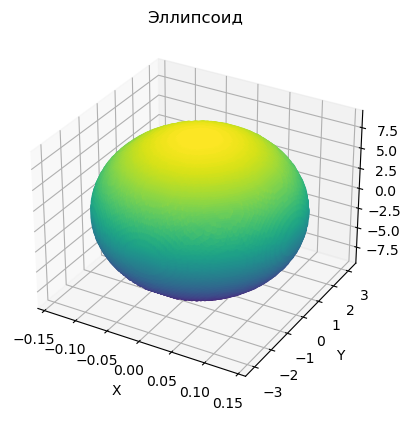

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = np.sqrt(1 / 48.728011386052735)
b = np.sqrt(1 / 0.10081971127567331)
c = np.sqrt(1 / 0.0137318908037351)

x = np.linspace(-a, a, 100)
y = np.linspace(-b, b, 100)
z = np.linspace(-c, c, 100)

x, y, z = np.meshgrid(x, y, z)

equation = 48.728011386052735 * x**2 + 0.10081971127567331 * y**2 + 0.0137318908037351 * z**2

colors = z.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Эллипсоид')

sc = ax.scatter(x[equation <= 1], y[equation <= 1], z[equation <= 1], c=colors[equation.flatten() <= 1], cmap='viridis', alpha=0.8)

plt.show()


**8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной Х и проверить её значимость на уровне alpha,alpha=0.02**

$ДНО\;функция\;\psi=C^T\beta,\;где\;C=\left(C_1,C_2..C_m\right)^T$<br>
$Формула\;F\;статистики$<br>
$\;F=\frac{\widehat\psi^T\left(\left(C^T\left(XX^T\right)^{-1}C\right)^{-1}\right)\widehat\psi}{qS^2}\sim F_{q,n-r}$<br>
$C^T=\begin{pmatrix}0&0&1\end{pmatrix}$<br>
$\psi=\begin{pmatrix}0&0&1\end{pmatrix}\times\begin{pmatrix}\beta_0\\\beta_1\\\beta_2\end{pmatrix}=\beta_2$<br>
$Квантиль$<br>
$\operatorname{𝑥}_\alpha:F_{q,n-r}\left(\operatorname{𝑥}_\alpha\right)=1-\alpha$<br>

In [142]:
def HypotesisCalc(n:int,x:list,alpha:float,beta:np.array,S_2:float)->None:
    """
    Функция для подсчета гипотезы
    """
    C_T: np.array = np.array([0,0,1])
    C: np.array = np.transpose(C_T)
        
    x_alpha:float = (sts.f(1,n-2)).ppf(1-alpha)

    XX_T = np.linalg.inv(np.dot(X, np.transpose(X)))
    C_T_XX_T_C = np.dot(np.dot(C_T,XX_T), C)    
    f = beta[1]**2/(C_T_XX_T_C*1*S_2)
    print(f"F=",f)
    print("x_alpha", x_alpha)
    if x_alpha<f:
        print("Гипотеза отвергается")
    else:
        print("Нет оснований отвергать гипотезу")
a:float = 0.02
HypotesisCalc(n,X,a,beta,S_2)

F= 13.599716361854707
x_alpha 5.7916334248808425
Гипотеза отвергается


## Выводы


В ходе выполнения практической работы была изучена тема регресионного анализа. Была разобрана тема метода наименьших квадратов для оценки параметров моделей, свойства данного метода, а также была рассмотрена роль МНК в регрессионном анализе.